<a href="https://colab.research.google.com/github/Sushila-Phogat/CE888/blob/master/adult_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd

colnames=['age', 'workclass', 'fnlwgt', 'education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary_class'] 
df1=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/CE888/master/Assignment1/data/adult.data', names=colnames, header=None)

df1.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [80]:
#Null value check
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary_class      0
dtype: int64

In [81]:
#NaN value check
df1.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary_class      0
dtype: int64

In [0]:
#Upon looking in deeply in data "?" was there for multiple column so raplacing it with other

df1.replace({'?': 'other', ' ?': 'other','  ?': 'other'}, inplace=True)

In [83]:
df1.replace({' <=50K': 0, ' >50K': 1}, inplace=True)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [84]:
#Checking imbalance of data with help of Z-score

from statistics import *

clas_mean= df1['salary_class'].mean()
clas_std = df1['salary_class'].std()
df1['z-score'] = (df1['salary_class']-clas_mean)/clas_std
values_plus_minus_one_z_score = len(df1[df1['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df1)*100
percent_values_plus_minus_one_z_score

75.91904425539757

In [85]:
df1['salary_class'].value_counts()

0    24720
1     7841
Name: salary_class, dtype: int64

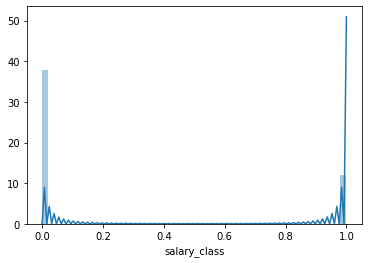

In [86]:
import seaborn as sns

sns.distplot(df1['salary_class'])


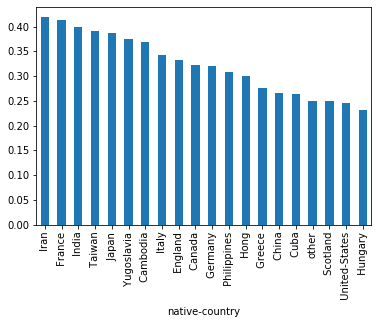

In [93]:
df1.groupby("native-country").salary_class.mean().sort_values(ascending=False)[:20].plot.bar()

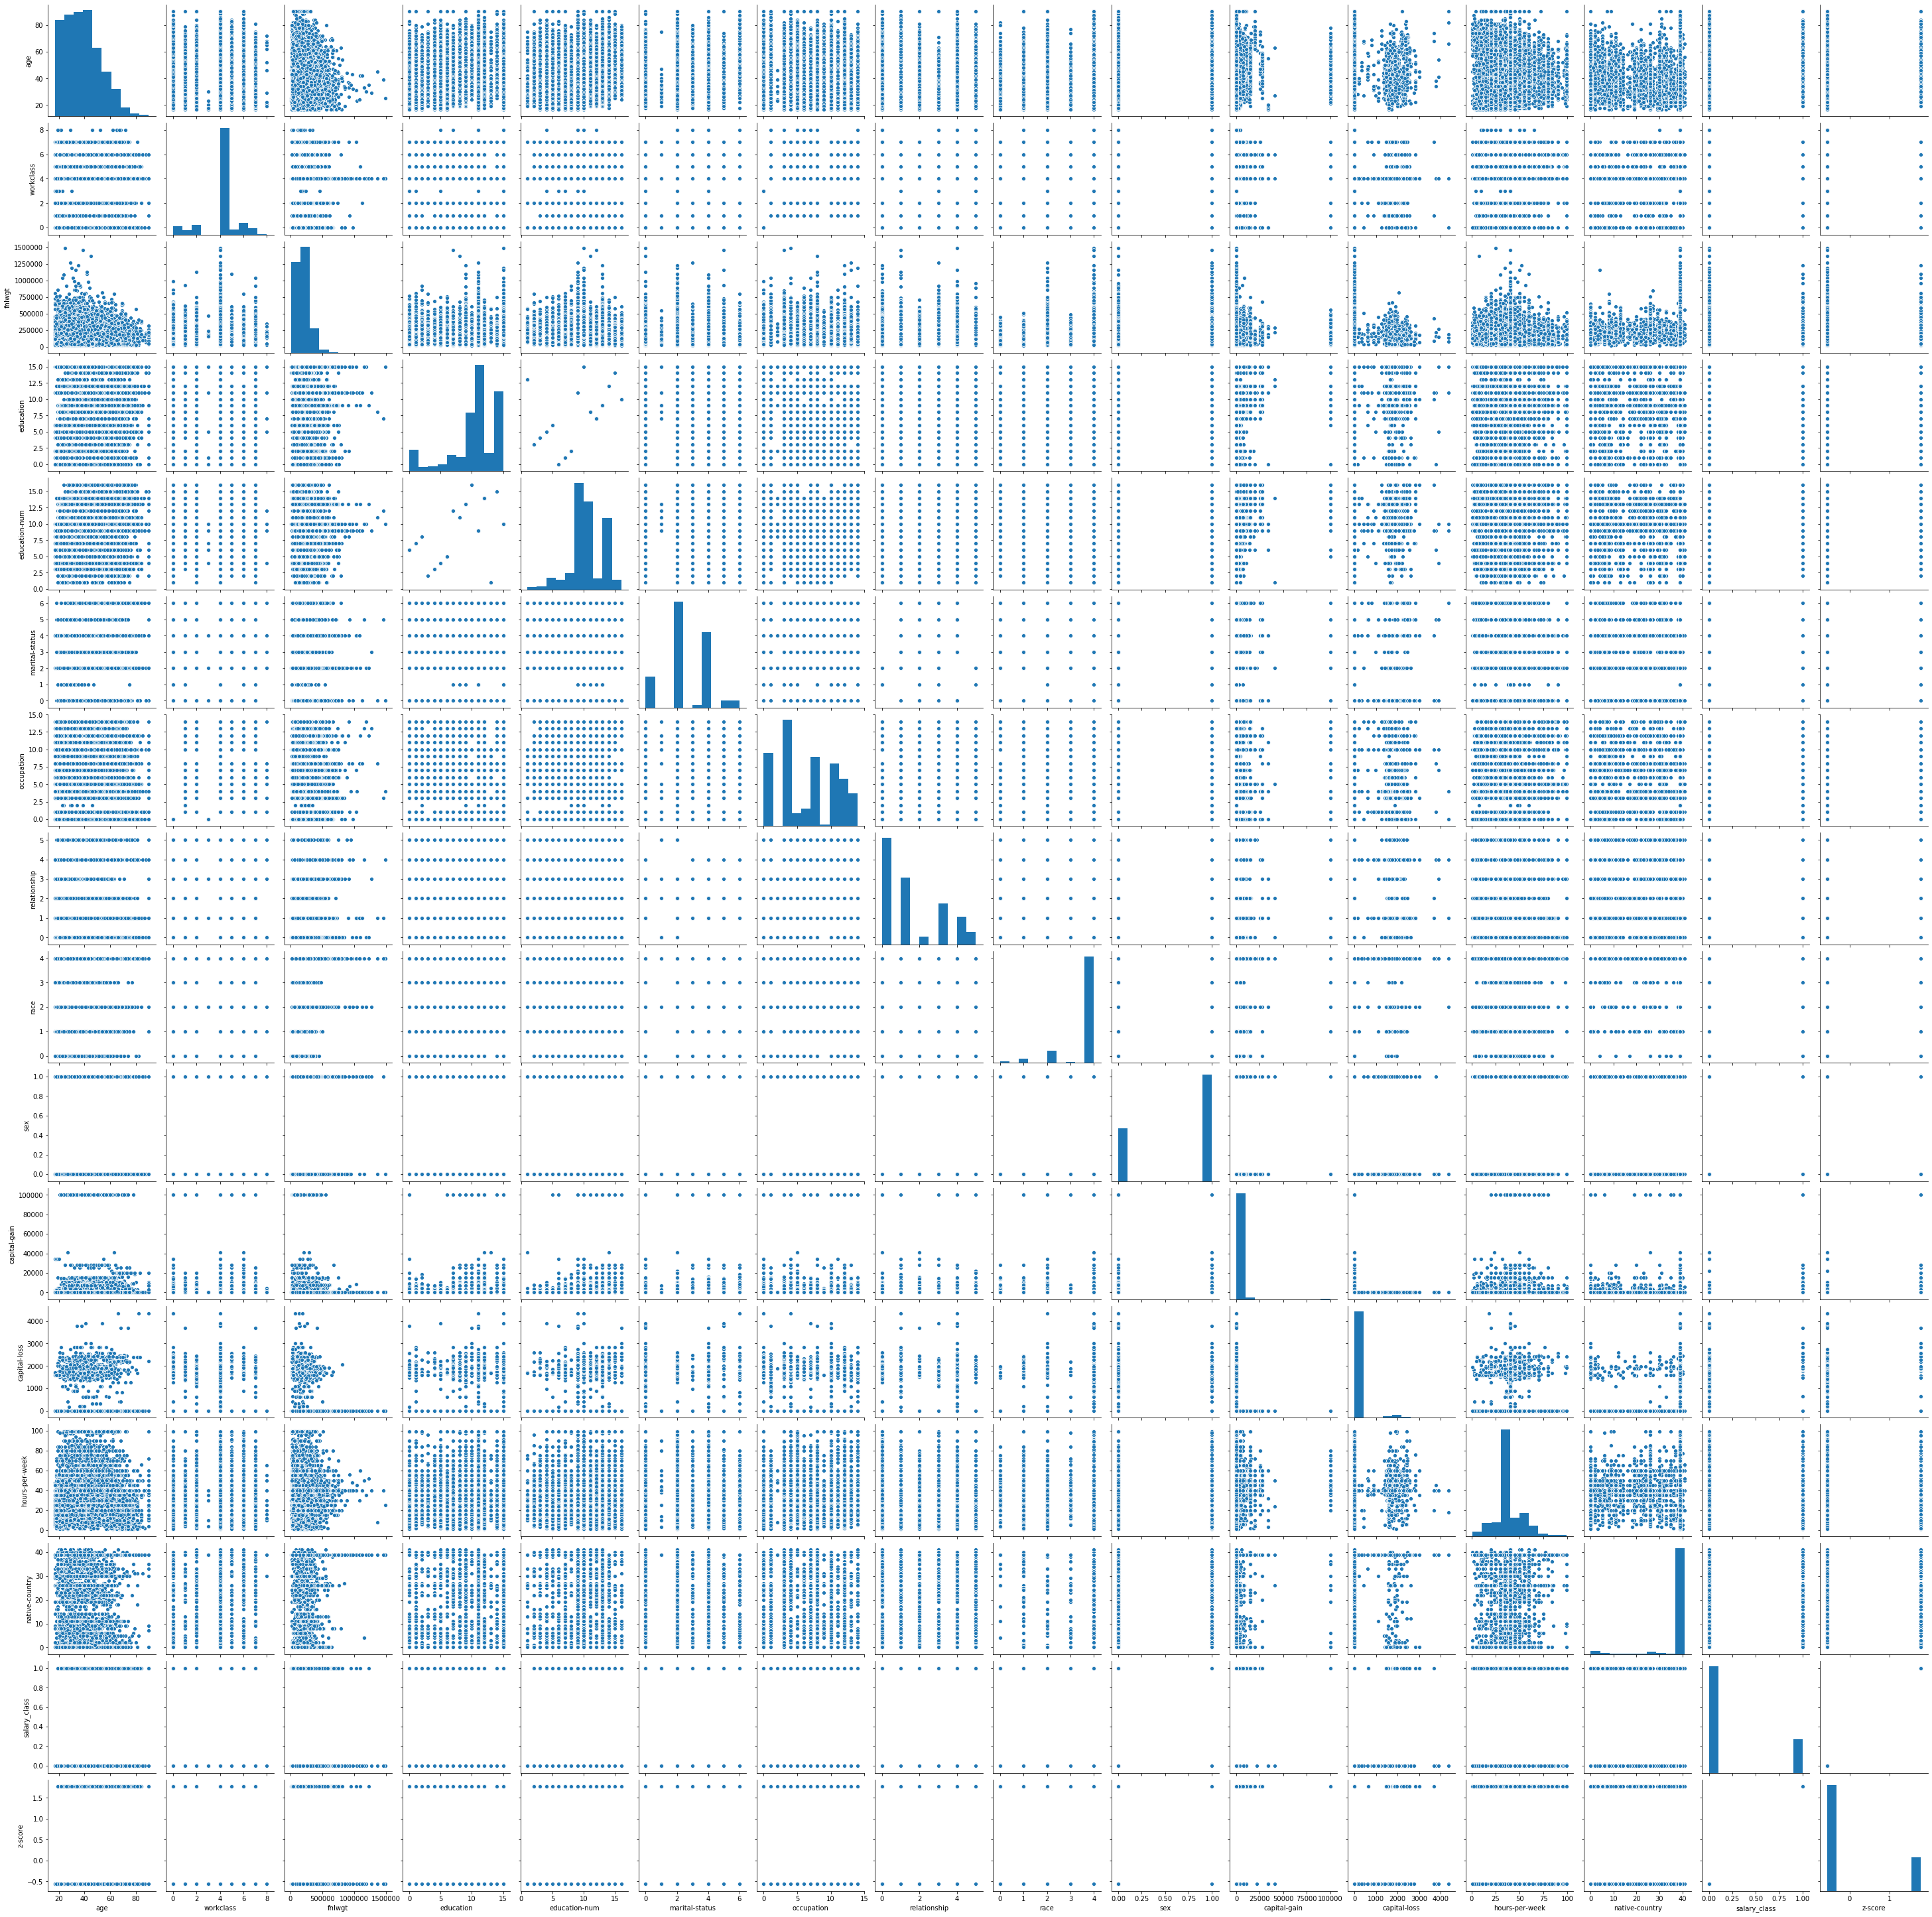

In [23]:
sns.pairplot(df1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f992e2d99e8>,
      dtype=object)

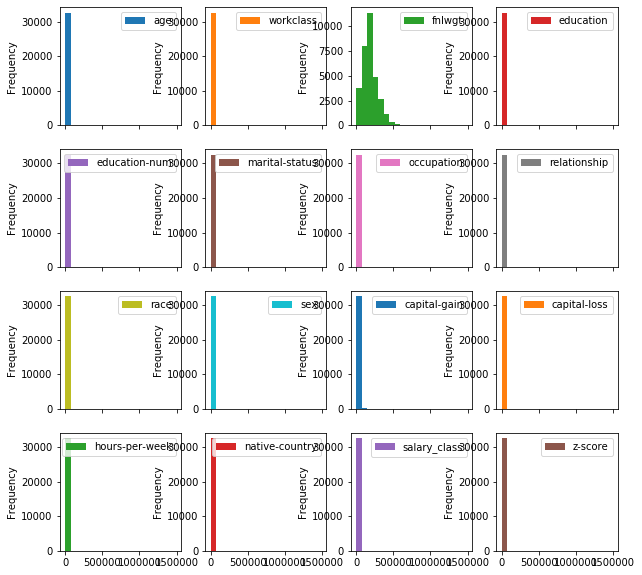

In [22]:
df1.plot.hist(subplots=True, layout=(4,4), figsize=(10, 10), bins=20)

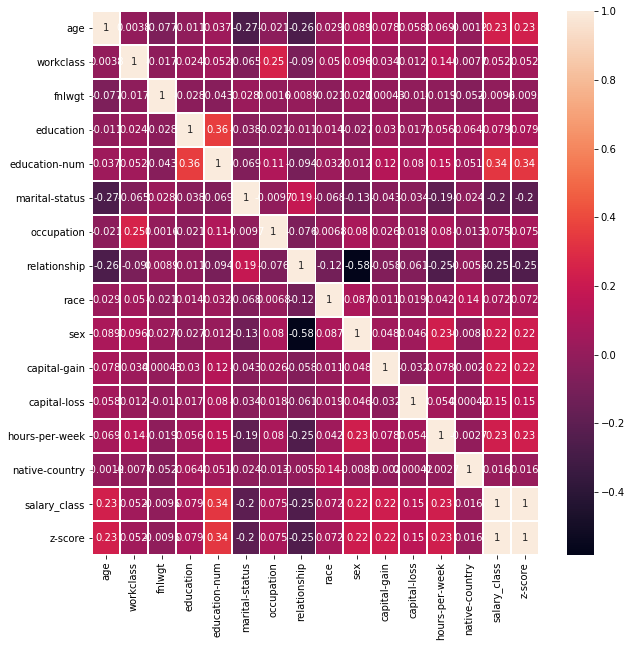

In [30]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(df1.corr(), annot=True,linewidths=.7, ax=ax)

In [16]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary_class', 'z-score'],
      dtype='object')

In [94]:
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df1[["workclass"]] = df1[["workclass"]].apply(LabelEncoder().fit_transform)
df1[["marital-status"]] = df1[["marital-status"]].apply(LabelEncoder().fit_transform)
df1[["education"]] = df1[["education"]].apply(LabelEncoder().fit_transform)
df1[["occupation"]] = df1[["occupation"]].apply(LabelEncoder().fit_transform)
df1[["relationship"]] = df1[["relationship"]].apply(LabelEncoder().fit_transform)
df1[["race"]] = df1[["race"]].apply(LabelEncoder().fit_transform)
df1[["sex"]] = df1[["sex"]].apply(LabelEncoder().fit_transform)
df1[["native-country"]] = df1[["native-country"]].apply(LabelEncoder().fit_transform)



df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary_class,z-score
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,-0.56319
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,-0.56319
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,-0.56319
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,-0.56319
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,-0.56319


In [95]:
#Decision Tree Cross validation
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV

features = ['age', 'workclass', 'fnlwgt', 'education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'] 
x = df1[features[:-1]]
y = df1['salary_class']


parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.8548263989880756 {'max_depth': 8}


In [97]:
#Normal cross validation of Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


classifier = RandomForestClassifier(n_estimators=300, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=x, y=y, cv=5)

print(all_accuracies.mean())## Accuracy is little better than decision tree


0.8576825841795902


In [0]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

clf = GridSearchCV(estimator=classifier, 
                    param_grid=grid_param,
                    cv=5,
                    refit=True,
                    error_score=0,
                    n_jobs=-1)

clf.fit(x,y)
best_parameters = gd_sr.best_params_
print(best_parameters)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [0]:
best_result = gd_sr.best_score_
print(best_result)